In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [46]:
# name columns
name_headers = ['age','workclass','fnlwgt','education','education_num',
         'marital_status','occupation',
         'relationship','race','sex','capital_gain',
         'capital_loss','hours_per_week','native_country','income']
# read data in
df=pd.read_csv(r'adult.csv',names=name_headers)

In [47]:
df = df.fillna(np.nan)
df = df.applymap(lambda x: np.nan if x=='?' else x)
sns.set(color_codes=True)

In [48]:
# map that we want to predict to a binary set of ints (0,1)
df['income_norm']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
#Numeric features
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income_norm']
#Categorical features
cat_features = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

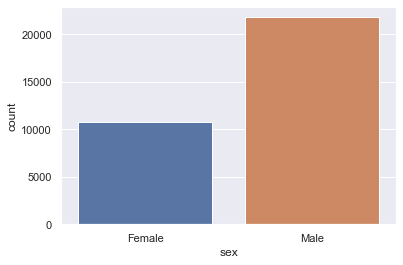

In [49]:
sns.countplot(df['sex'])

In [39]:
#Feature engineering
df['sex'] = df['sex'].map({"Male":0,"Female":1})
#df['sex'] = df['sex'].astype(int) # set column as type int
df = df.dropna()

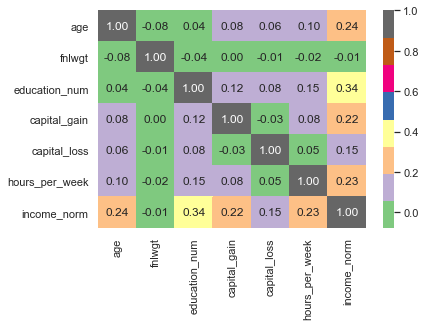

In [40]:
# correlation matrix of features
sns.heatmap(df[numeric_features].corr(), fmt='.2f',cmap='Accent',annot=True)
# low correlation outside of age,hours,capital gain,income

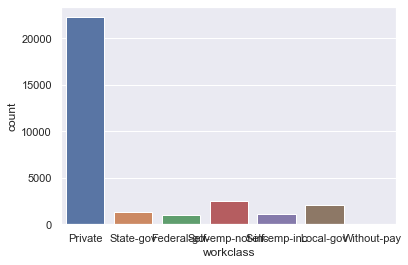

In [41]:
# primarily private sector
df['workclass'].value_counts()
count = sns.countplot(df['workclass'])

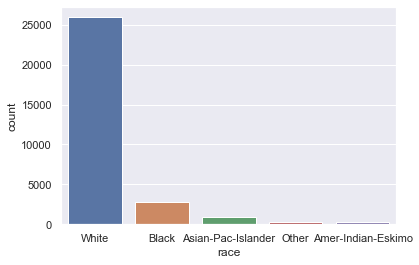

In [42]:
# see race dist, primarily white
df['race'].value_counts()
sns.countplot(df['race'])

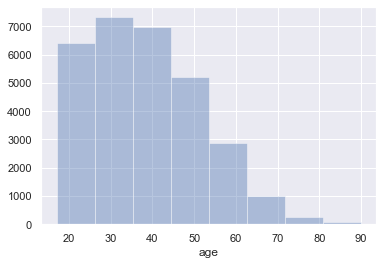

In [43]:
#looking at age distribution
#primarily middle age majority 20-50s
df['age'].value_counts()
sns.distplot(df['age'],bins=8, kde=False)

[Text(0, 0, 'Widowed'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Married-AF-spouse')]

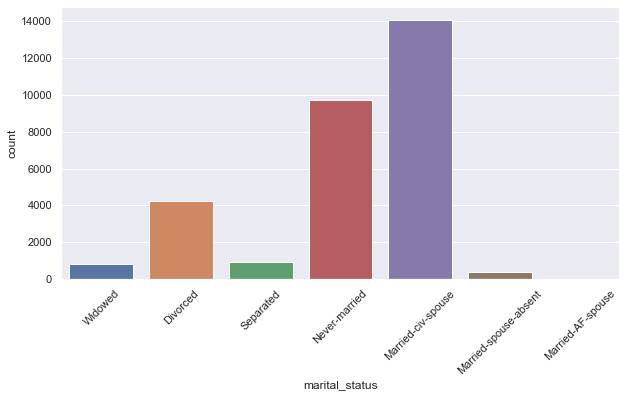

In [44]:
plt.figure(figsize=(10,5))
chart = sns.countplot(df['marital_status'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

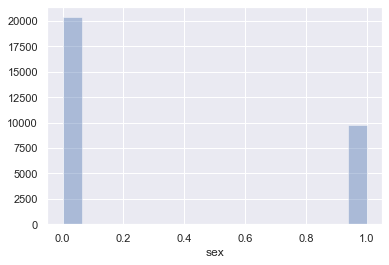

In [45]:
sns.distplot(df['sex'], kde=False)
#sns.despine(bottom=True)